In [13]:
import numpy as np
import pandas as pd

D = np.load('../data/train_features.npy')
headers = ['beat']
for i in range(12):
    for j in range(20):
        headers.append('stft%d_%d'%(i,j))
headers += ['tunning', 'zero crossing', 'max_rms', 'min_rms', 'mean_rms', 'std_rms']
headers += [ 'max_centroid', 'min_centroid', 'mean_centroid', 'std_centroid']
headers += [ 'max_flatness', 'min_flatness', 'mean_flatness', 'std_flatness']
for i in range(20):
    headers += [ 'max_mfcc%d'%i, 'min_mfcc%d'%i, 'mean_mfcc%d'%i, 'std_mfcc%d'%i]
for i in range(170):
    headers.append('autoCorr%d'%i)
headers += ['mean_rms_h', 'std_rms_h', 'mean_centroid_h', 'std_centroid_h', 'mean_flatness_h', 'std_flatness_h', 'beat_h', 'zero crossing_h']
headers += ['mean_rms_p', 'std_rms_p', 'mean_centroid_p', 'std_centroid_p', 'mean_flatness_p', 'std_flatness_p', 'beat_p', 'zero crossing_p']
headers.append('corr')

In [14]:
df = pd.DataFrame(D, columns = headers)
df

,beat,stft0_0,stft0_1,stft0_2,stft0_3,stft0_4,stft0_5,stft0_6,stft0_7,stft0_8,...,zero crossing_h,mean_rms_p,std_rms_p,mean_centroid_p,std_centroid_p,mean_flatness_p,std_flatness_p,beat_p,zero crossing_p,corr
0,123.046875,0.929194,0.999243,0.998013,0.997342,0.996748,0.998839,0.989594,0.999178,0.987412,...,0.029118,0.071442,0.051302,1871.640046,1148.728532,0.022756,0.049181,123.046875,0.076300,37.512499
1,95.703125,0.935299,0.994673,0.989620,0.938694,0.993156,0.997871,0.998079,0.947577,0.972461,...,0.071858,0.126519,0.077212,2785.941910,1201.738400,0.056310,0.073378,95.703125,0.150361,65.924663
2,151.999081,0.820908,0.915739,0.997154,0.815205,0.995722,0.995221,0.995340,0.996534,0.963727,...,0.077513,0.114169,0.057088,2848.567625,967.264776,0.061050,0.064408,151.999081,0.124812,19.886538
3,161.499023,0.907249,0.992721,0.963728,0.996987,0.996147,0.999030,0.997560,0.994780,0.994807,...,0.051344,0.089692,0.035133,2981.632092,1332.937979,0.041235,0.049923,161.499023,0.190382,13.984885
4,95.703125,0.000000,0.999734,0.999762,0.999727,0.999703,0.994545,0.999216,0.998722,0.999440,...,0.060123,0.015862,0.014453,2090.441539,899.210236,0.041804,0.052000,95.703125,0.111381,88.090674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19904,198.768029,0.950205,0.997078,0.996853,0.997088,0.997128,0.996669,0.996900,0.989113,0.985274,...,0.032877,0.080916,0.060029,1554.397966,851.728047,0.017596,0.036795,99.384014,0.078106,26.555463
19905,123.046875,0.959366,0.942796,0.999803,0.990381,1.000000,0.994947,0.981478,0.812486,0.666122,...,0.045898,0.048055,0.033859,2652.293989,982.139008,0.033334,0.035543,123.046875,0.136034,40.604446
19906,129.199219,0.892612,0.989999,0.998380,0.992014,0.886933,0.999580,0.999130,1.000000,0.995522,...,0.038813,0.042406,0.036780,2498.945684,1114.243832,0.035421,0.052730,129.199219,0.121775,70.020325
19907,135.999178,0.670283,1.000000,0.998753,0.983286,0.767479,0.984950,0.988854,0.990933,0.966689,...,0.036408,0.074978,0.083560,3118.513420,2228.462041,0.016428,0.021687,135.999178,0.209729,74.003636


# Auto correlations
Columns close to each others have strong correlations.

Decided to remain only `21, 63, 106, 149`.

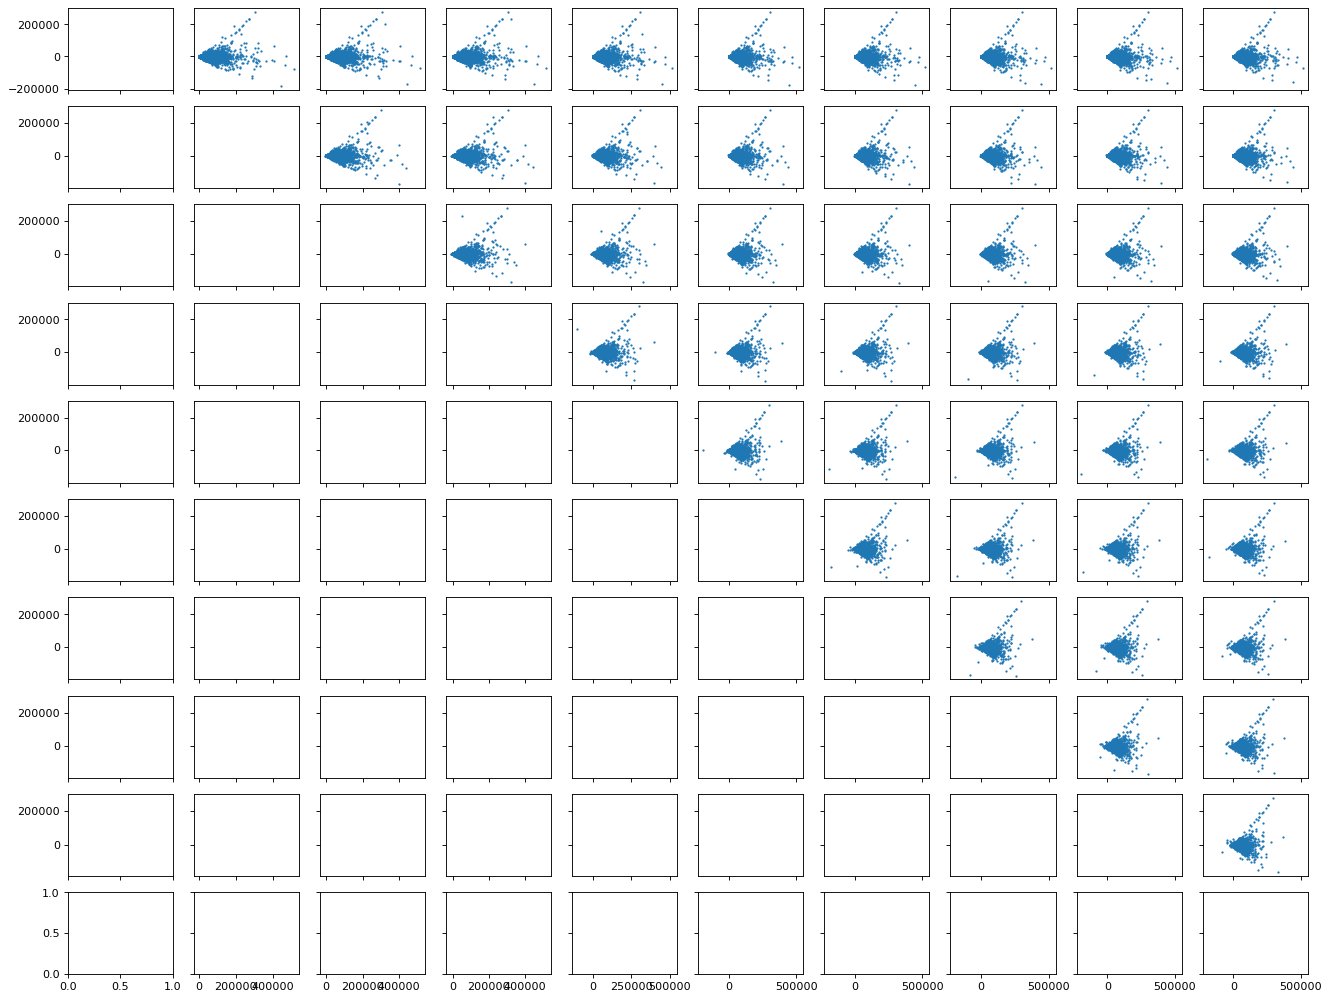

In [64]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(10, 10, sharex='col', sharey='row',figsize = (20,16),dpi = 80)
for i in range(9):
    k = i + 10
    for j in range(i+1,10):
         ax[i][j].scatter(df['autoCorr%d'%i],df['autoCorr%d'%(j+90)],1)   


# stft
Remain all

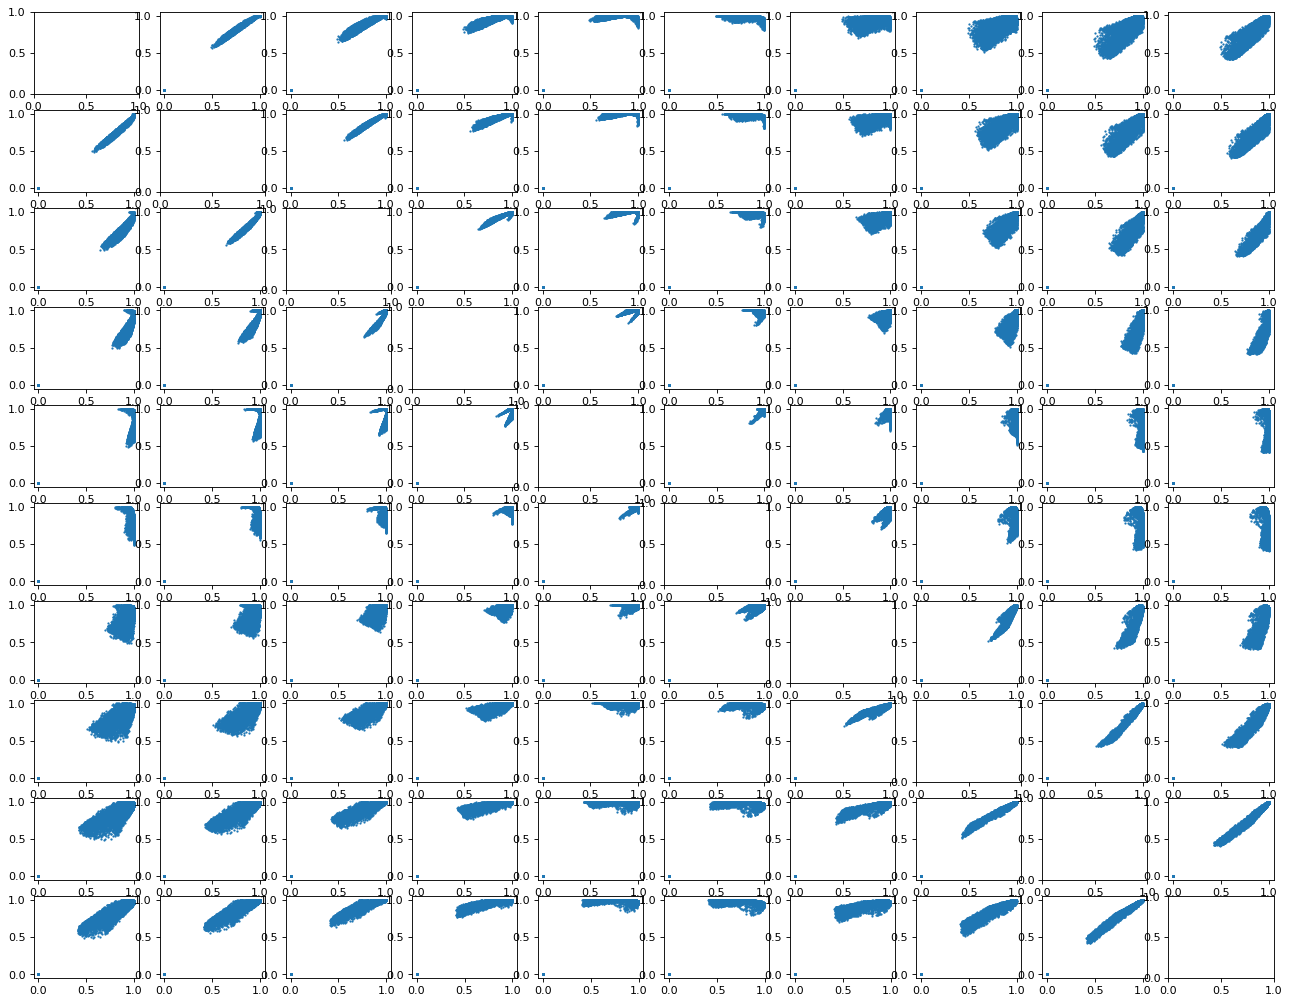

In [44]:
fig, ax = plt.subplots(10, 10,figsize = (20,16),dpi = 80)
for i in range(10):
    for j in range(10):
        if i == j:
            continue
        ax[i][j].scatter(df['stft%d_0'%i],df['stft%d_0'%j],1)   

In [67]:
dropCol = []
remain = [21,63,106,149]
for i in range(170):
    if i in remain:
        continue
    dropCol.append('autoCorr%d'%i)
filterd = df.drop(columns = dropCol)
filterd

,beat,stft0_0,stft0_1,stft0_2,stft0_3,stft0_4,stft0_5,stft0_6,stft0_7,stft0_8,...,zero crossing_h,mean_rms_p,std_rms_p,mean_centroid_p,std_centroid_p,mean_flatness_p,std_flatness_p,beat_p,zero crossing_p,corr
0,123.046875,0.929194,0.999243,0.998013,0.997342,0.996748,0.998839,0.989594,0.999178,0.987412,...,0.029118,0.071442,0.051302,1871.640046,1148.728532,0.022756,0.049181,123.046875,0.076300,37.512499
1,95.703125,0.935299,0.994673,0.989620,0.938694,0.993156,0.997871,0.998079,0.947577,0.972461,...,0.071858,0.126519,0.077212,2785.941910,1201.738400,0.056310,0.073378,95.703125,0.150361,65.924663
2,151.999081,0.820908,0.915739,0.997154,0.815205,0.995722,0.995221,0.995340,0.996534,0.963727,...,0.077513,0.114169,0.057088,2848.567625,967.264776,0.061050,0.064408,151.999081,0.124812,19.886538
3,161.499023,0.907249,0.992721,0.963728,0.996987,0.996147,0.999030,0.997560,0.994780,0.994807,...,0.051344,0.089692,0.035133,2981.632092,1332.937979,0.041235,0.049923,161.499023,0.190382,13.984885
4,95.703125,0.000000,0.999734,0.999762,0.999727,0.999703,0.994545,0.999216,0.998722,0.999440,...,0.060123,0.015862,0.014453,2090.441539,899.210236,0.041804,0.052000,95.703125,0.111381,88.090674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19904,198.768029,0.950205,0.997078,0.996853,0.997088,0.997128,0.996669,0.996900,0.989113,0.985274,...,0.032877,0.080916,0.060029,1554.397966,851.728047,0.017596,0.036795,99.384014,0.078106,26.555463
19905,123.046875,0.959366,0.942796,0.999803,0.990381,1.000000,0.994947,0.981478,0.812486,0.666122,...,0.045898,0.048055,0.033859,2652.293989,982.139008,0.033334,0.035543,123.046875,0.136034,40.604446
19906,129.199219,0.892612,0.989999,0.998380,0.992014,0.886933,0.999580,0.999130,1.000000,0.995522,...,0.038813,0.042406,0.036780,2498.945684,1114.243832,0.035421,0.052730,129.199219,0.121775,70.020325
19907,135.999178,0.670283,1.000000,0.998753,0.983286,0.767479,0.984950,0.988854,0.990933,0.966689,...,0.036408,0.074978,0.083560,3118.513420,2228.462041,0.016428,0.021687,135.999178,0.209729,74.003636


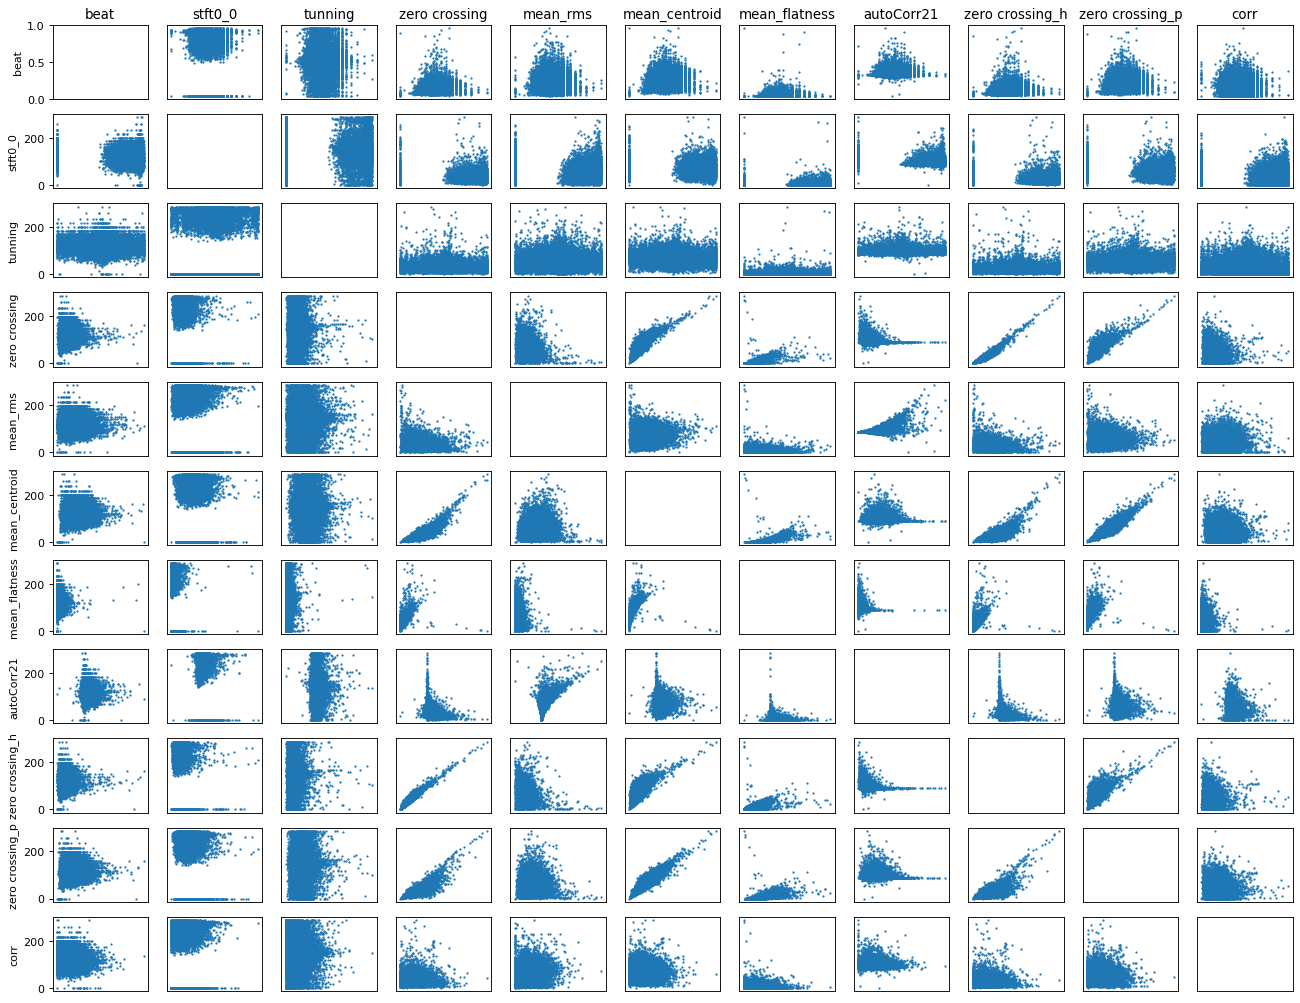

In [68]:
checkbetween = ['beat', 'stft0_0', 'tunning', 'zero crossing', 'mean_rms', 'mean_centroid', 'mean_flatness', 'autoCorr21', 'zero crossing_h', 'zero crossing_p','corr']

fig, ax = plt.subplots(11, 11,figsize = (20,16),dpi = 80)
for i in range(11):
    for j in range(11):
        ax[i][j].get_xaxis().set_visible(False)
        if i == 0:
            ax[i][j].set_title(checkbetween[j])
        if j == 0:
            ax[i][j].set_ylabel(checkbetween[i])
        else:
            ax[i][j].get_yaxis().set_visible(False)
        if i == j:
            continue
        ax[i][j].scatter(df[checkbetween[i]],df[checkbetween[j]],1)
fig.savefig('../figures/check_feature_corr.png')
        

In [69]:
filterd.to_csv('../data/processed_train.csv',index = False)

In [70]:
np.save('../data/processed_train.npy',filterd.to_numpy())

In [71]:
np.load('../data/processed_train.npy').shape

(19909, 356)